## FIFA 선수 이적료 예측 경진대회

 id : 선수 고유의 아이디

 name : 이름

 age : 나이

 continent : 선수들의 국적이 포함되어 있는 대륙입니다

 contract_until : 선수의 계약기간이 언제까지인지 나타내어 
줍니다

 position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등

 prefer_foot : 선수가 선호하는 발입니다. ex) 오른발

 reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수

 stat_overall : 선수의 현재 능력치 입니다.

 stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.

 stat_skill_moves : 선수의 개인기 능력치 입니다.

 value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test = pd.read_csv('FIFA_test.csv')
train = pd.read_csv('FIFA_train.csv')
submission = pd.read_csv('submission.csv')

In [ ]:
# Train 데이터 5개 확인
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [ ]:
# 수치형 데이터의 개수나 평균 값 확인
train.describe()

,id,age,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


1. 나이 : 평균 25세, Max = 40
2. 평판 : 평균 1.13, Min = 1, Max = 5, 대부분 1
3. 현재 능력치 : 평균 67
4. 잠재력 : 평균 71
5. 개인기 : 평균 2.4, Min = 1, Max = 5
6. 가치 : 평균 

In [ ]:
# 범주형 데이터 확인
train.describe(include=['O'])

,name,continent,contract_until,position,prefer_foot
count,8932,8932,8932,8932,8932
unique,8932,5,17,4,2
top,L. Messi,europe,2019,MF,right
freq,1,5322,2366,3428,6837


7. 국가 : 5개
8. 계약기간 : 17개
9. 포지션 : 4개
10. 주발 : 오른발

In [ ]:
# 데이터 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [ ]:
# 결측치 확인
train.isnull().sum()

id                  0
name                0
age                 0
continent           0
contract_until      0
position            0
prefer_foot         0
reputation          0
stat_overall        0
stat_potential      0
stat_skill_moves    0
value               0
dtype: int64

* 결측치 없음 확인

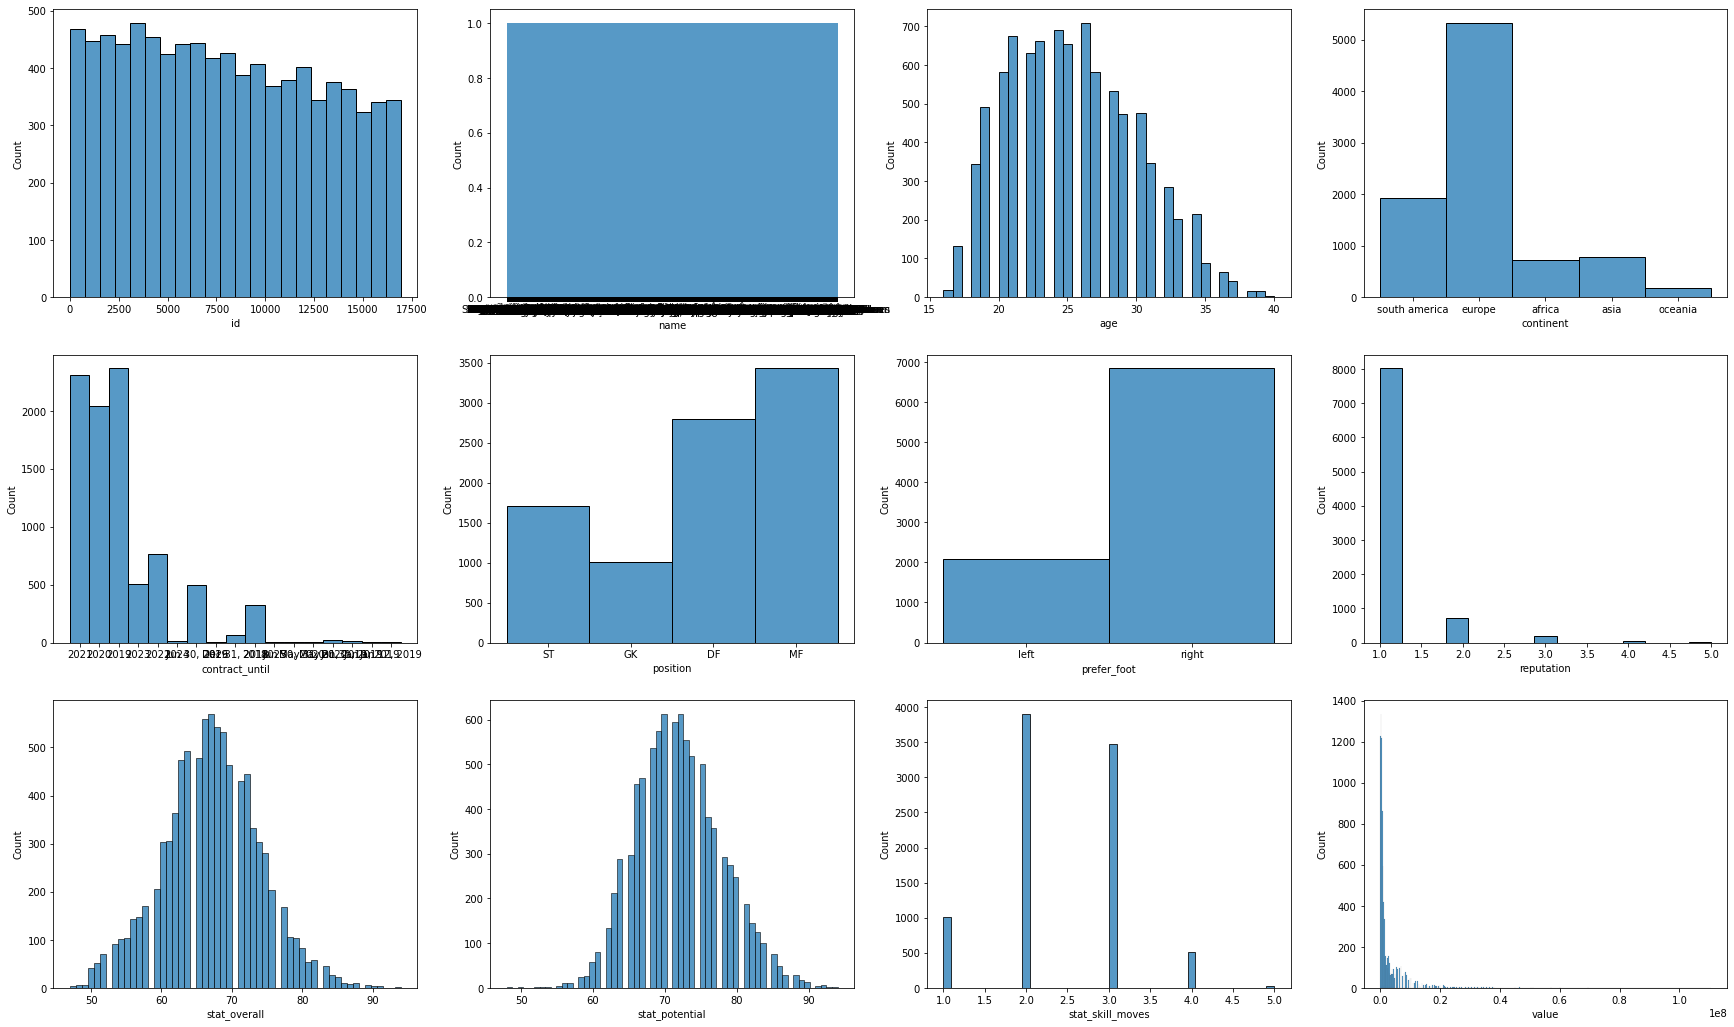

In [ ]:
f, axes = plt.subplots(3,4, figsize=(30,18))
axes = axes.flatten()
for col, ax in zip(train.columns, axes):
  sns.histplot(data = train, x=col, ax=ax)
plt.show()

* Name 컬럼은 삭제(유의미한 도출이 나오지 않는다 판단)
* Age는 20 초반 ~ 중반에 대부분 분포
* 유럽 국적의 사람이 절반 이상
* 현재 능력치, 잠재력 분포 확인
* 포지션은 미드필더가 가장 많음
* 주 발이 오른발이 많다는 것 확인 가능
* 계약기간 : 2021, 2020, 2019 선수 대부분
* 평판은 1이 대부분
* 개인기 능력 2가 제일 많고, 5는 소수라는 것 확인


## 데이터 정규화

* Name Column 삭제

In [ ]:
train = train.drop(['name'], axis = 1)

* Continent 범주화

In [ ]:
train['continent'].value_counts()

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64

In [ ]:
# 개수 5개 확인
train['continent'] = train['continent'].replace('europe',1)
train['continent'] = train['continent'].replace('south america',2)
train['continent'] = train['continent'].replace('asia',3)
train['continent'] = train['continent'].replace('africa',4)
train['continent'] = train['continent'].replace('oceania',5)

* Contract_Until 범주화

In [ ]:
train['contract_until'].value_counts()

2019            2366
2021            2308
2020            2041
2022             761
2023             506
Jun 30, 2019     501
2018             327
Dec 31, 2018      64
May 31, 2019      19
2024              12
Jan 31, 2019      10
Jun 30, 2020       9
2025               3
Jan 1, 2019        2
2026               1
May 31, 2020       1
Jan 12, 2019       1
Name: contract_until, dtype: int64

 계약 년도로 표기 통일

In [ ]:
def year(x):
  x = x[-4:] # 뒤에 있는 년도 들고오기
  return int(x)

train['contract_until'] = train['contract_until'].apply(year)


In [ ]:
train['contract_until'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until, dtype: int64

* Position 범주화

In [ ]:
train['position'].value_counts()

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64

In [ ]:
train['position'] = train['position'].replace('MF',1)
train['position'] = train['position'].replace('DF',2)
train['position'] = train['position'].replace('ST',3)
train['position'] = train['position'].replace('GK',4)

* Prefer_foot 범주화

In [ ]:
train['prefer_foot'].value_counts()

right    6837
left     2095
Name: prefer_foot, dtype: int64

In [ ]:
train['prefer_foot'] = train['prefer_foot'].replace('right',1)
train['prefer_foot'] = train['prefer_foot'].replace('left',2)

* 데이터 타입 정리

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   age               8932 non-null   int64  
 2   continent         8932 non-null   int64  
 3   contract_until    8932 non-null   int64  
 4   position          8932 non-null   int64  
 5   prefer_foot       8932 non-null   int64  
 6   reputation        8932 non-null   float64
 7   stat_overall      8932 non-null   int64  
 8   stat_potential    8932 non-null   int64  
 9   stat_skill_moves  8932 non-null   float64
 10  value             8932 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 767.7 KB


In [ ]:
train.describe()

,id,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
mean,7966.775750,25.209136,1.712494,2020.194357,2.032803,1.234550,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,4.635515,1.049107,1.266901,1.012484,0.423741,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,16.000000,1.000000,2018.000000,1.000000,1.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,21.000000,1.000000,2019.000000,1.000000,1.000000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,25.000000,1.000000,2020.000000,2.000000,1.000000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,28.000000,2.000000,2021.000000,3.000000,1.000000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,16948.000000,40.000000,5.000000,2026.000000,4.000000,2.000000,5.000000,94.000000,94.000000,5.000000,1.105000e+08


In [ ]:
train.head()

,id,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,31,2,2021,3,2,5.0,94,94,4.0,110500000.0
1,3,27,1,2020,4,1,4.0,91,93,1.0,72000000.0
2,7,31,2,2021,3,1,5.0,91,91,3.0,80000000.0
3,8,32,1,2020,2,1,4.0,91,91,3.0,51000000.0
4,9,25,1,2021,4,1,3.0,90,93,1.0,68000000.0


In [ ]:
train['stat_skill_moves'].value_counts()

2.0    3905
3.0    3473
1.0    1008
4.0     515
5.0      31
Name: stat_skill_moves, dtype: int64

In [ ]:
train['stat_skill_moves'] = train['stat_skill_moves'].astype(int)

In [ ]:
train['reputation'].value_counts()

1.0    8014
2.0     706
3.0     177
4.0      31
5.0       4
Name: reputation, dtype: int64

In [ ]:
train['reputation'] = train['reputation'].astype(int)

In [ ]:
train.head()

,id,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,31,2,2021,3,2,5,94,94,4,110500000.0
1,3,27,1,2020,4,1,4,91,93,1,72000000.0
2,7,31,2,2021,3,1,5,91,91,3,80000000.0
3,8,32,1,2020,2,1,4,91,91,3,51000000.0
4,9,25,1,2021,4,1,3,90,93,1,68000000.0


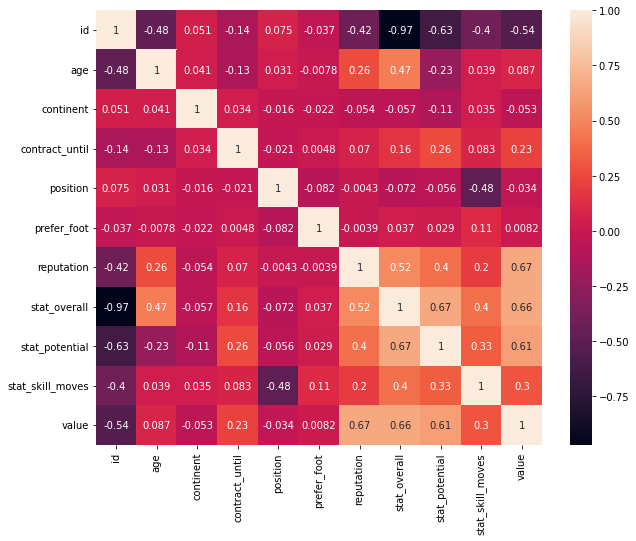

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot = True)
plt.show()

* 가치와 상관관계가 유의미한 컬럼
1. 평판
2. 능력치
3. 잠재력

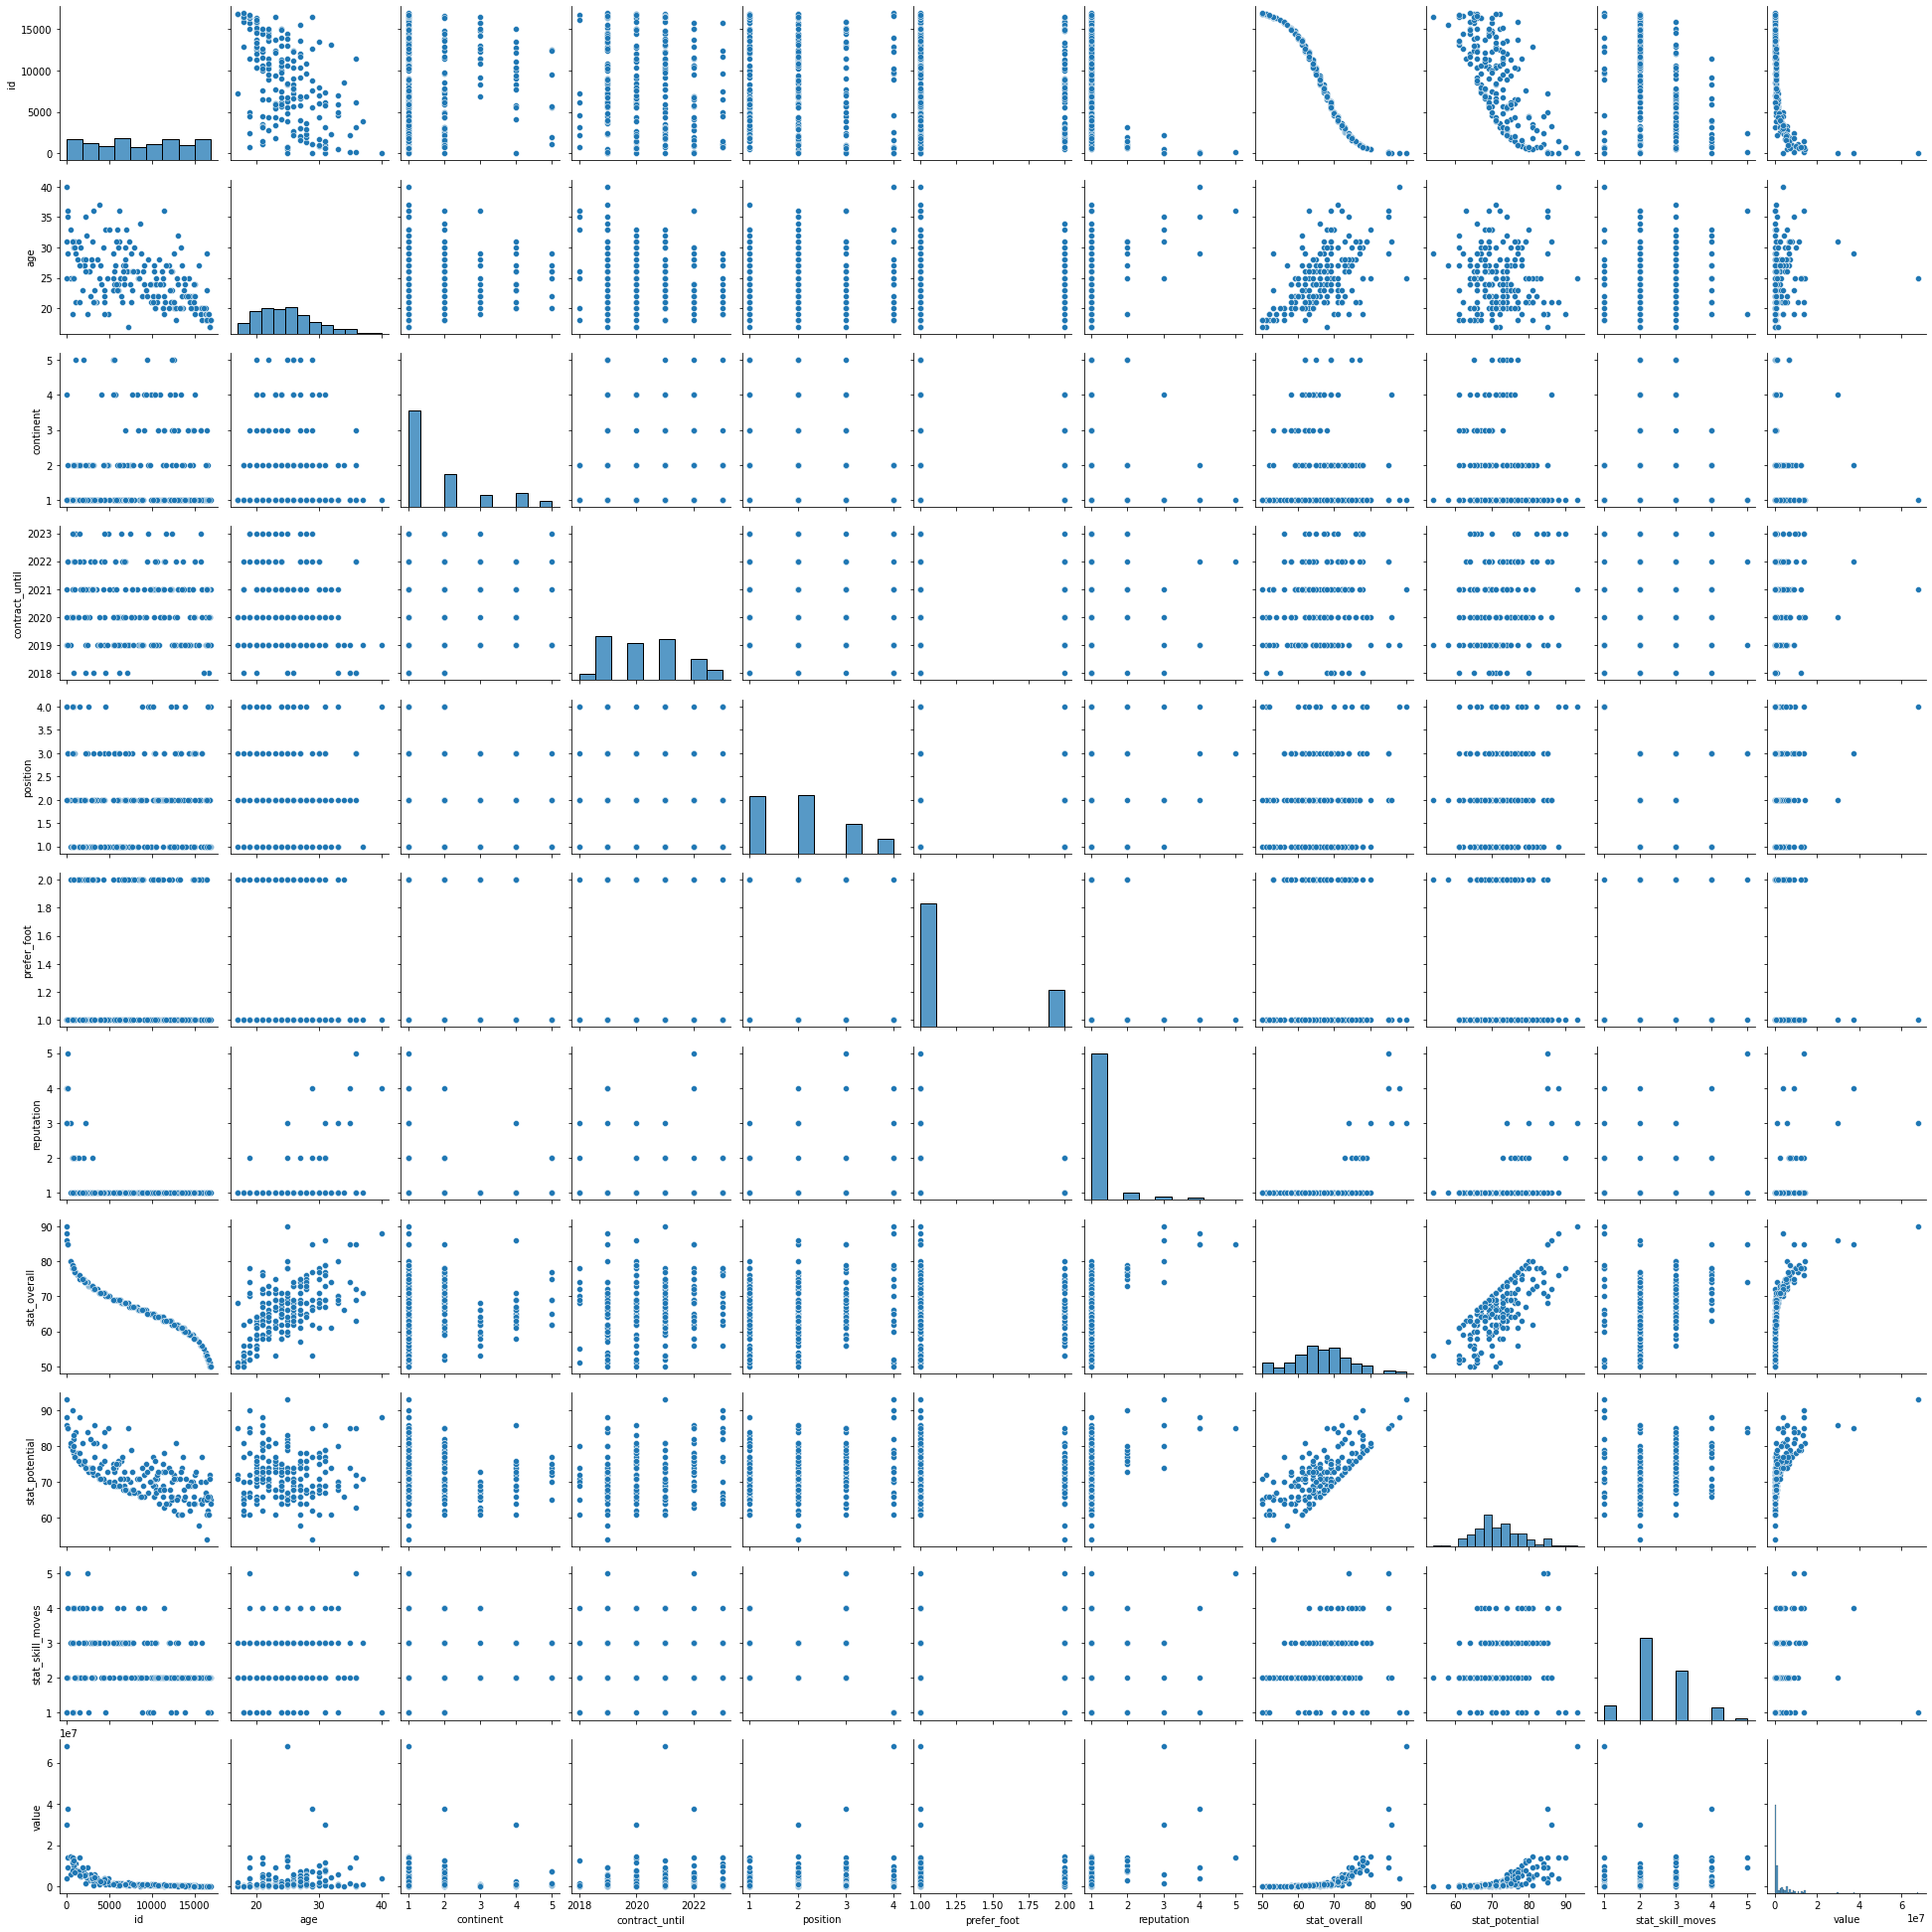

In [ ]:
sns.pairplot(train.sample(200))
plt.show()

<Figure size 1080x576 with 0 Axes>

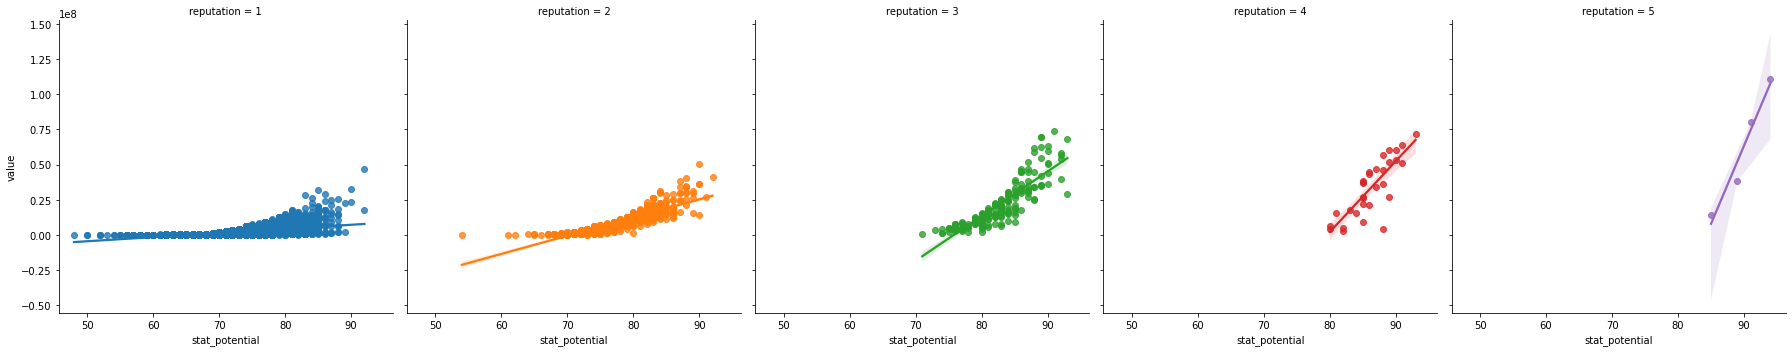

In [ ]:
plt.figure(figsize=(15,8))
sns.lmplot(data=train, x='stat_potential', y ='value',col='reputation',hue='reputation')

<Figure size 1080x576 with 0 Axes>

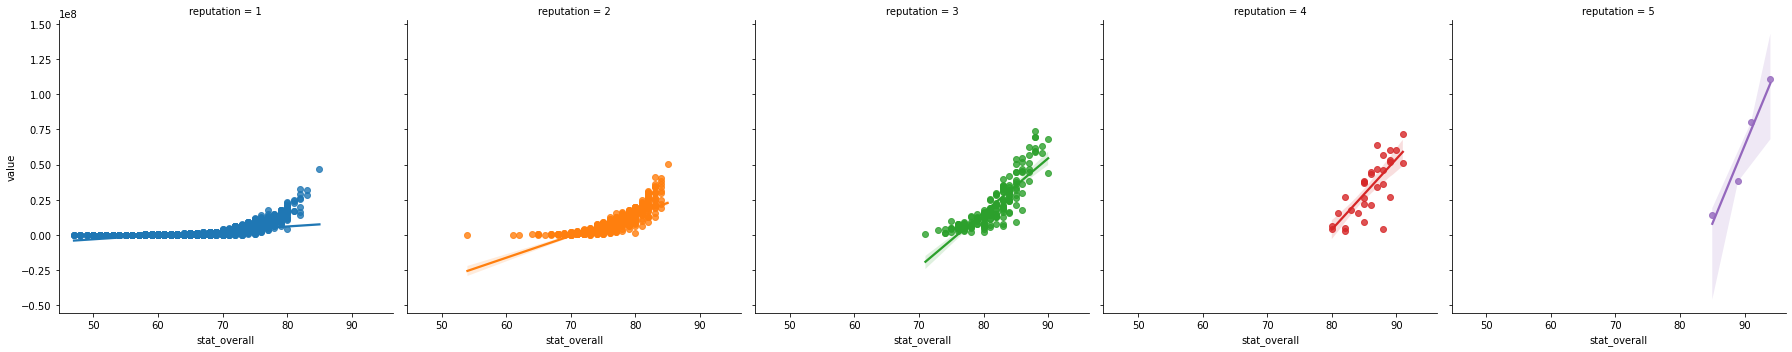

In [ ]:
plt.figure(figsize=(15,8))
sns.lmplot(data=train, x='stat_overall', y ='value',col='reputation',hue='reputation')

* 기울기에 따른 가치 변화 

평판이 높아질수록 기울기가 커지는 것을 파악 할 수 있다.


1. ID와 유의미한 컬럼의 시각화

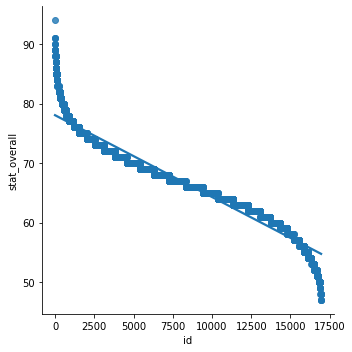

In [ ]:
# ID와 Stat_Overall에 관한 시각화
sns.lmplot(x="id", y="stat_overall", data=train)
plt.show()

ID가 낮을수록 스탯이 높은 것을 파악 할 수 있다.

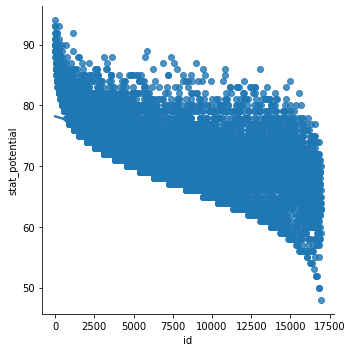

In [ ]:
# ID와 Stat_Potential에 관한 시각화
sns.lmplot(x="id", y="stat_potential", data=train)
plt.show()

ID가 낮을수록 잠재력이 높은 것을 파악 할 수 있는데, ID가 커질수록 범위가 커지는 것을 볼 수 있다.



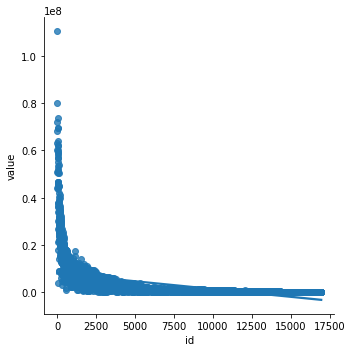

In [ ]:
# ID와 Value에 관한 시각화
sns.lmplot(x="id", y="value", data=train)
plt.show()

ID가 낮을 수록 가치가 커지는 것을 파악 할 수 있다.

2. Age와 유의미한 컬럼의 시각화

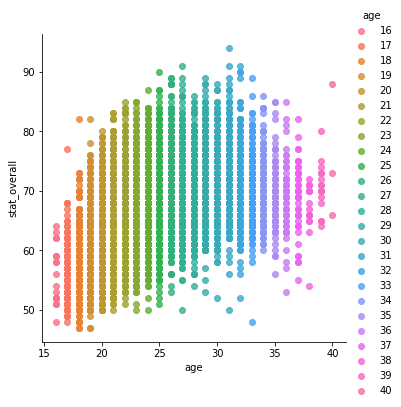

In [ ]:
# Age와 Stat_Overall에 관한 시각화
sns.lmplot(x="age", y="stat_overall", data=train, hue = 'age')
plt.show()

Age는 15세부터 능력치가 증가하다가 30세 이후부터 감소하는 것을 볼 수있다.

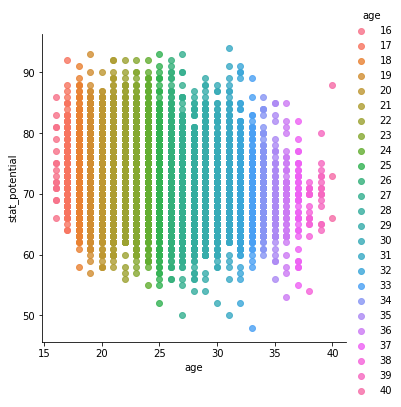

In [ ]:
# Age와 Stat_Overall에 관한 시각화
sns.lmplot(x="age", y="stat_potential", data=train, hue = 'age')
plt.show()

이와 다르게 Age가 15세부터 잠재력이 높은 것을 불 수 있으며, 30세 이후부터 낮아지는 것을 볼 수 있다.

3. Position과 유의미한 컬럼의 시각화

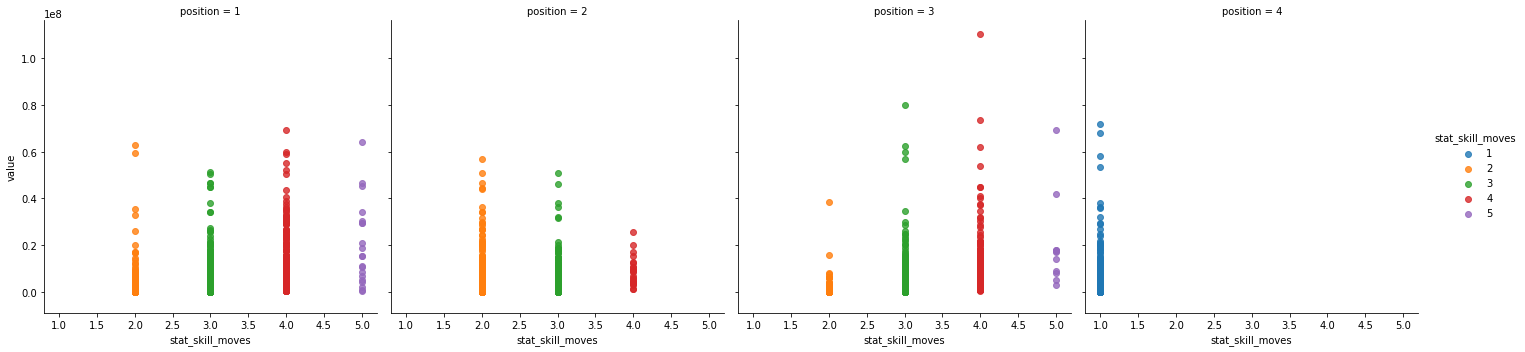

In [ ]:
# Position과 Stat_skill_moves에 관한 시각화
sns.lmplot(x="stat_skill_moves", y="value", col= "position",hue = "stat_skill_moves", data=train)
plt.show()

- 포지션

1 : 미드필더

2 : 수비수

3 : 공격수

4 : 골키퍼

- 미드필더는 개인기 능력치의 값이 4가 많으며, 가치는 2보다 3이 3보다 4가 평균적으로 높은 것을 볼 수 있다. 하지만 개인기 능력치가 5라고해서 가치가 높다라고 판단 할 수 없다.

- 수비수는 개인기 능력치의 값이 2가 많으며, 가치는 2가 3보다 높은 것을 볼 수 있다. 따라서 수비수는 개인기가 중요하지 않다고 판단 할 수 있다.

- 공격수는 개인기 능력치의 값이 2의 값이 적은 것을 볼 수 있으며, 개인기 능력치의 값이 4인 사람들이 평균적으로 가치가 높은 것을 볼 수 있다.

- 골키퍼는 개인기 능력치가 1이며, 모두 동일한 것을 볼 수 있다.